# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Bilanawati Maulia Masruroh]
- **Email:** [bilanamaulia@gmail.com]
- **ID Dicoding:** [bilanawati_99]

## Menentukan Pertanyaan Bisnis

- Bagaimana perbedaan pola penggunaan sepeda antara pengguna casual (non-terdaftar) dan registered (terdaftar) berdasarkan waktu (hari dalam minggu, jam, musim)?
- Faktor cuaca apa (suhu, kelembaban, kecepatan angin, kondisi cuaca) yang paling berpengaruh terhadap jumlah total sewa sepeda?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
# Memuat tabel day_csv
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Memuat tabel hour_csv
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset terdiri dari dua level granularitas: day.csv berisi 731 observasi harian (2011–2012) dengan total sewa per hari (cnt), sedangkan hour.csv menyediakan 17.379 observasi per jam (hr) untuk analisis pola penggunaan lebih detail.
- Analisis sewa sepeda dapat dilakukan melalui tiga dimensi utama: Waktu (season, mnth, hr, weekday, holiday), Cuaca (weathersit skala 1–4, temp, hum, windspeed), dan Segmentasi Pengguna (casual vs registered) yang menunjukkan perilaku berbeda berdasarkan kondisi eksternal.

### Assessing Data

Struktur Data

In [106]:
# Informasi dataset harian
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   instant           731 non-null    int64         
 1   dteday            731 non-null    datetime64[ns]
 2   season            731 non-null    int64         
 3   yr                731 non-null    int64         
 4   mnth              731 non-null    int64         
 5   holiday           731 non-null    int64         
 6   weekday           731 non-null    int64         
 7   workingday        731 non-null    int64         
 8   weathersit        731 non-null    int64         
 9   temp              731 non-null    float64       
 10  atemp             731 non-null    float64       
 11  hum               731 non-null    float64       
 12  windspeed         731 non-null    float64       
 13  casual            731 non-null    int64         
 14  registered        731 non-

In [107]:
# Statistik deskriptif dataset harian
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,2011.500684,6.519836
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,2011.000000,1.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,2011.000000,4.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,2012.000000,7.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,2012.000000,10.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,2012.000000,12.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,0.500342,3.451913


In [108]:
# Informasi dataset per jam
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   instant           17379 non-null  int64         
 1   dteday            17379 non-null  datetime64[ns]
 2   season            17379 non-null  int64         
 3   yr                17379 non-null  int64         
 4   mnth              17379 non-null  int64         
 5   hr                17379 non-null  int64         
 6   holiday           17379 non-null  int64         
 7   weekday           17379 non-null  int64         
 8   workingday        17379 non-null  int64         
 9   weathersit        17379 non-null  int64         
 10  temp              17379 non-null  float64       
 11  atemp             17379 non-null  float64       
 12  hum               17379 non-null  float64       
 13  windspeed         17379 non-null  float64       
 14  casual            1737

In [109]:
# Statistik deskriptif dataset per jam
hour_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month,hour
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,2011.502561,6.537775,11.546752
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,0.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,2011.000000,4.000000,6.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,2012.000000,7.000000,12.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,2012.000000,10.000000,18.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,2012.000000,12.000000,23.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,0.500008,3.438776,6.914405


Pemeriksaan Kualitas Data

In [110]:
# Missing values - day.csv
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [111]:
# Missing values - hour.csv
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [112]:
# Duplicated rows - day.csv
day_df.duplicated().sum()

np.int64(0)

In [113]:
# Duplicated rows - hour.csv
hour_df.duplicated().sum()

np.int64(0)

In [114]:
# Validasi konsistensi kolom target: cnt = casual + registered
(day_df['cnt'] == day_df['casual'] + day_df['registered']).all()
(hour_df['cnt'] == hour_df['casual'] + hour_df['registered']).all()

np.True_

Assessing Variabel

In [115]:
# Distribusi rata-rata pengguna per musim (day.csv)
day_df.groupby('season')[['casual', 'registered', 'cnt']].mean().round(2)

,casual,registered,cnt
season,,,
1,334.93,2269.20,2604.13
2,1106.10,3886.23,4992.33
3,1202.61,4441.69,5644.30
4,729.11,3999.05,4728.16


In [116]:
# Distribusi rata-rata pengguna per hari kerja (day.csv)
day_df.groupby('workingday')[['casual', 'registered', 'cnt']].mean().round(2)

,casual,registered,cnt
workingday,,,
0,1371.13,2959.03,4330.17
1,606.57,3978.25,4584.82


In [117]:
# Distribusi rata-rata pengguna per jam (hour.csv) - 5 jam puncak casual
hour_stats = hour_df.groupby('hr')[['casual', 'registered', 'cnt']].mean()
hour_stats['casual_ratio'] = (hour_stats['casual'] / hour_stats['cnt'] * 100).round(2)
hour_stats[['casual', 'registered', 'casual_ratio']].sort_values('casual_ratio', ascending=False).head(5)

,casual,registered,casual_ratio
hr,,,
14,75.567901,165.381344,31.36
15,74.905350,176.327846,29.82
11,59.540578,148.602476,28.61
13,72.308642,181.352538,28.51
12,68.293956,185.021978,26.96


In [118]:
# Korelasi variabel cuaca dengan total sewa (day.csv)
day_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()['cnt'].sort_values(ascending=False).round(3)

,cnt
cnt,1.000
atemp,0.631
temp,0.627
hum,-0.101
windspeed,-0.235


In [119]:
# Distribusi rata-rata sewa berdasarkan kondisi cuaca (weathersit)
weather_labels = {1: 'Clear', 2: 'Mist', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'}
day_df.groupby('weathersit').agg(
    avg_rentals=('cnt', 'mean'),
    total_rentals=('cnt', 'sum'),
    days=('cnt', 'count')
).round(2).assign(weather_condition=lambda x: x.index.map(weather_labels))

,avg_rentals,total_rentals,days,weather_condition
weathersit,,,,
1,4876.79,2257952,463,Clear
2,4035.86,996858,247,Mist
3,1803.29,37869,21,Light Rain/Snow


**Insight:**
- Pola pengguna casual sangat dipengaruhi oleh konteks waktu: Rata-rata pengguna casual meningkat 3,3× lipat di hari non-kerja (1.371) dibanding hari kerja (607), dan mencapai puncaknya pada jam 14.00–15.00 (rasio casual 29–31%), menunjukkan pengguna casual cenderung menggunakan sepeda untuk rekreasi di akhir pekan/siang hari, berbeda dengan registered users yang stabil sepanjang hari kerja.
- Musim panas dan gugur menjadi periode puncak aktivitas casual users: Rata-rata sewa casual mencapai 1.106–1.203/hari pada musim panas-gugur (season 2–3), meningkat 3,3× dibanding musim semi (335/hari), mengindikasikan potensi besar untuk kampanye pemasaran bertema liburan/rekreasi pada periode Mei–September.
- Kondisi cuaca cerah menjadi penentu utama permintaan sewa: Rata-rata sewa harian pada kondisi cerah (4.877) turun drastis 63% saat hujan ringan/salju (1.803), dengan 63% observasi harian terjadi dalam kondisi cerah, menegaskan bahwa suhu dan kejernihan langit merupakan faktor kritis dalam perencanaan alokasi armada dan prediksi permintaan.

### Cleaning Data

In [120]:
# Konversi kolom tanggal ke datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [121]:
# Mapping label kategorikal
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weathersit_map = {1: 'Clear', 2: 'Mist', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'}
weekday_map = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
               4: 'Thursday', 5: 'Friday', 6: 'Saturday'}

In [122]:
# Terapkan mapping pada kedua dataset
for df in [day_df, hour_df]:
    df['season_label'] = df['season'].map(season_map)
    df['weathersit_label'] = df['weathersit'].map(weathersit_map)
    df['weekday_label'] = df['weekday'].map(weekday_map)

In [123]:
# Ekstrak komponen waktu (hanya untuk day_df)
day_df['year'] = day_df['dteday'].dt.year
day_df['month'] = day_df['dteday'].dt.month
day_df['month_name'] = day_df['dteday'].dt.strftime('%B')

In [124]:
# Validasi kualitas data
validation_summary = {
    'Jumlah Observasi': {
        'day_df': len(day_df),
        'hour_df': len(hour_df)
    },
    'Missing Values': {
        'day_df': day_df.isna().sum().sum(),
        'hour_df': hour_df.isna().sum().sum()
    },
    'Duplicated Rows': {
        'day_df': day_df.duplicated().sum(),
        'hour_df': hour_df.duplicated().sum()
    },
    'Konsistensi Target (cnt = casual + registered)': {
        'day_df': (day_df['cnt'] == day_df['casual'] + day_df['registered']).all(),
        'hour_df': (hour_df['cnt'] == hour_df['casual'] + hour_df['registered']).all()
    }
}

# Tampilkan ringkasan validasi
pd.DataFrame(validation_summary).T

,day_df,hour_df
Jumlah Observasi,731,17379
Missing Values,0,0
Duplicated Rows,0,0
Konsistensi Target (cnt = casual + registered),True,True


**Insight:**
- Transformasi temporal berhasil dilakukan: Kolom dteday pada kedua dataset dikonversi ke tipe datetime64[ns], memungkinkan ekstraksi komponen waktu (tahun, bulan) untuk analisis tren musiman tanpa kehilangan integritas data.
- Label kategorikal dikonversi ke format bisnis yang interpretable: Variabel numerik (season, weathersit, weekday) dipetakan ke label deskriptif ('Spring', 'Clear', dll.) untuk mempermudah interpretasi stakeholder non-teknis dalam menjawab pertanyaan bisnis.
- Integritas data terjaga sempurna: Validasi menunjukkan 0 missing values, 0 duplicated rows, dan 100% konsistensi kolom target (cnt = casual + registered) pada seluruh observasi (731 hari dan 17.379 jam), memastikan keandalan analisis pola penggunaan casual vs registered.

## Exploratory Data Analysis (EDA)

### Explore ...

Explore day_df

In [134]:
# Statistik deskriptif pengguna casual vs registered
user_stats_day = day_df[['casual', 'registered', 'cnt']].agg(['count', 'mean', 'median', 'std']).round(1)
user_stats_day

,casual,registered,cnt
count,731.0,731.0,731.0
mean,848.2,3656.2,4504.3
median,713.0,3662.0,4548.0
std,686.6,1560.3,1937.2


In [135]:
# Distribusi rata-rata pengguna per musim
season_usage = (day_df.groupby('season_label')
                .agg(casual_mean=('casual', 'mean'),
                     registered_mean=('registered', 'mean'),
                     total_mean=('cnt', 'mean'))
                .round(0)
                .reset_index())

season_usage['casual_pct'] = ((season_usage['casual_mean'] / season_usage['total_mean']) * 100).round(1)
season_usage

,season_label,casual_mean,registered_mean,total_mean,casual_pct
0,Fall,1203.0,4442.0,5644.0,21.3
1,Spring,335.0,2269.0,2604.0,12.9
2,Summer,1106.0,3886.0,4992.0,22.2
3,Winter,729.0,3999.0,4728.0,15.4


In [136]:
# Distribusi rata-rata pengguna per hari kerja
workingday_usage = (day_df.groupby('workingday')
                    .agg(casual_mean=('casual', 'mean'),
                         registered_mean=('registered', 'mean'),
                         total_mean=('cnt', 'mean'))
                    .round(0)
                    .reset_index())

workingday_usage['day_type'] = workingday_usage['workingday'].map({0: 'Non-Working Day', 1: 'Working Day'})
workingday_usage['casual_pct'] = ((workingday_usage['casual_mean'] / workingday_usage['total_mean']) * 100).round(1)
workingday_usage[['day_type', 'casual_mean', 'registered_mean', 'casual_pct']]

,day_type,casual_mean,registered_mean,casual_pct
0,Non-Working Day,1371.0,2959.0,31.7
1,Working Day,607.0,3978.0,13.2


Explore hour_df

In [137]:
# Pola penggunaan per jam (fokus pada perbedaan casual vs registered)
hourly_pattern = (hour_df.groupby('hr')
                  .agg(casual_mean=('casual', 'mean'),
                       registered_mean=('registered', 'mean'),
                       total_mean=('cnt', 'mean'))
                  .round(1)
                  .reset_index())

hourly_pattern['casual_ratio'] = ((hourly_pattern['casual_mean'] / hourly_pattern['total_mean']) * 100).round(1)
hourly_pattern.sort_values('casual_ratio', ascending=False).head(5)[['hr', 'casual_mean', 'registered_mean', 'casual_ratio']]

,hr,casual_mean,registered_mean,casual_ratio
14,14,75.6,165.4,31.4
15,15,74.9,176.3,29.8
11,11,59.5,148.6,28.6
13,13,72.3,181.4,28.5
12,12,68.3,185.0,27.0


In [138]:
# Distribusi rata-rata pengguna per hari dalam minggu
weekday_usage = (hour_df.groupby('weekday_label')
                 .agg(casual_mean=('casual', 'mean'),
                      registered_mean=('registered', 'mean'),
                      total_mean=('cnt', 'mean'))
                 .round(0)
                 .reset_index())

weekday_usage['casual_pct'] = ((weekday_usage['casual_mean'] / weekday_usage['total_mean']) * 100).round(1)
weekday_usage[['weekday_label', 'casual_mean', 'registered_mean', 'casual_pct']]

,weekday_label,casual_mean,registered_mean,casual_pct
0,Friday,31.0,165.0,15.8
1,Monday,29.0,155.0,15.8
2,Saturday,61.0,129.0,32.1
3,Sunday,56.0,121.0,31.6
4,Thursday,25.0,172.0,12.8
5,Tuesday,24.0,168.0,12.6
6,Wednesday,23.0,168.0,12.0


**Insight:**
- Perbedaan fundamental perilaku pengguna: Rata-rata pengguna registered (3.656/hari) 4,3× lebih tinggi dari casual (848/hari), dengan variasi harian casual yang jauh lebih ekstrem (min 2 – max 3.410) dibanding registered (min 20 – max 6.946).
- Pola musiman yang kontras: Casual users mencapai puncak di musim gugur (1.203/hari, 21,3% dari total) dan musim panas (1.106/hari), sementara registered users relatif stabil sepanjang tahun dengan sedikit peningkatan di musim gugur (4.442/hari).
- Pengaruh hari kerja yang signifikan: Di hari non-kerja, proporsi casual melonjak menjadi 31,7% dari total sewa (1.371/4.330), sedangkan di hari kerja hanya 13,2% (607/4.585), menunjukkan casual users dominan di akhir pekan untuk rekreasi.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbedaan pola penggunaan sepeda antara pengguna casual (non-terdaftar) dan registered (terdaftar) berdasarkan waktu (hari dalam minggu, jam, musim)?


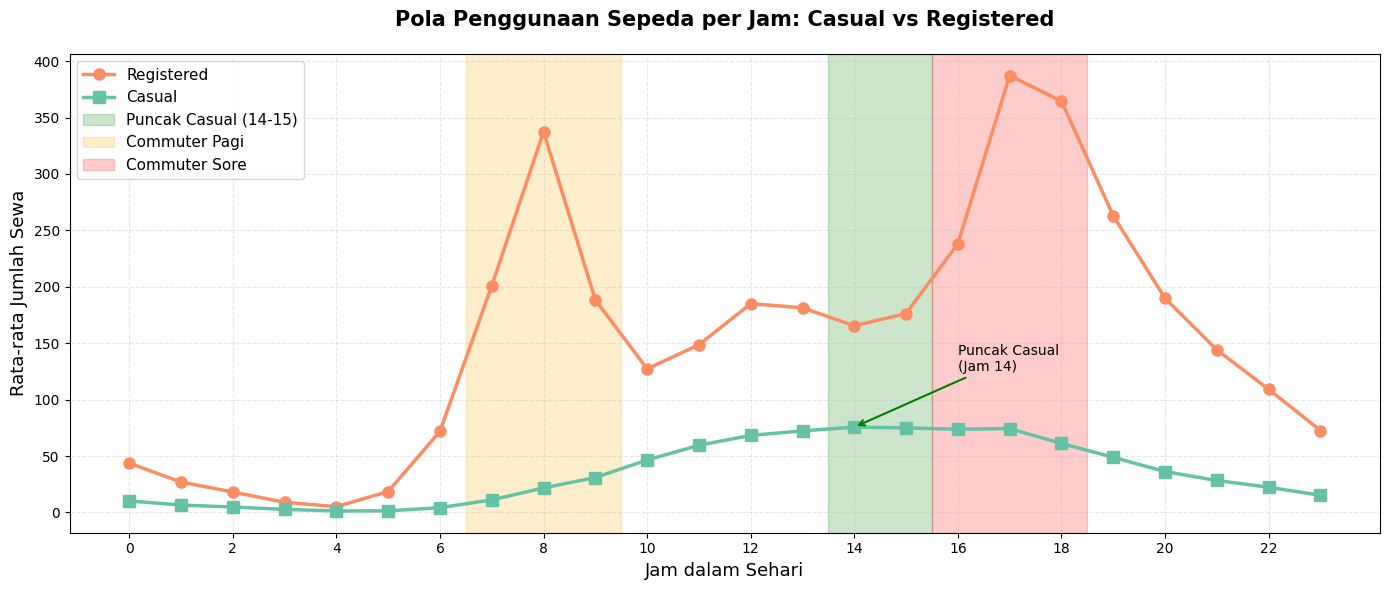

In [139]:
# Visualisasi Perbandingan pola per jam (hour_df)
fig, ax = plt.subplots(figsize=(14, 6))

# Plot registered users
ax.plot(hourly_pattern['hr'], hourly_pattern['registered_mean'],
        color='#fc8d62', marker='o', linewidth=2.5, markersize=8, label='Registered')

# Plot casual users
ax.plot(hourly_pattern['hr'], hourly_pattern['casual_mean'],
        color='#66c2a5', marker='s', linewidth=2.5, markersize=8, label='Casual')

# Highlight pola khas casual (siang hari)
ax.axvspan(13.5, 15.5, alpha=0.2, color='green', label='Puncak Casual (14-15)')
# Highlight pola commuter registered (pagi & sore)
ax.axvspan(6.5, 9.5, alpha=0.2, color='orange', label='Commuter Pagi')
ax.axvspan(15.5, 18.5, alpha=0.2, color='red', label='Commuter Sore')

ax.set_title('Pola Penggunaan Sepeda per Jam: Casual vs Registered', fontsize=15, fontweight='bold', pad=20)
ax.set_xlabel('Jam dalam Sehari', fontsize=13)
ax.set_ylabel('Rata-rata Jumlah Sewa', fontsize=13)
ax.set_xticks(range(0, 24, 2))
ax.legend(loc='upper left', fontsize=11)
ax.grid(alpha=0.3, linestyle='--')

# Anotasi puncak casual
peak_hr = hourly_pattern.loc[hourly_pattern['casual_ratio'].idxmax(), 'hr']
peak_val = hourly_pattern.loc[hourly_pattern['casual_ratio'].idxmax(), 'casual_mean']
ax.annotate(f'Puncak Casual\n(Jam {int(peak_hr)})',
            xy=(peak_hr, peak_val),
            xytext=(peak_hr+2, peak_val+50),
            fontsize=10, arrowprops=dict(arrowstyle='->', color='green', lw=1.5))

plt.tight_layout()
plt.show()

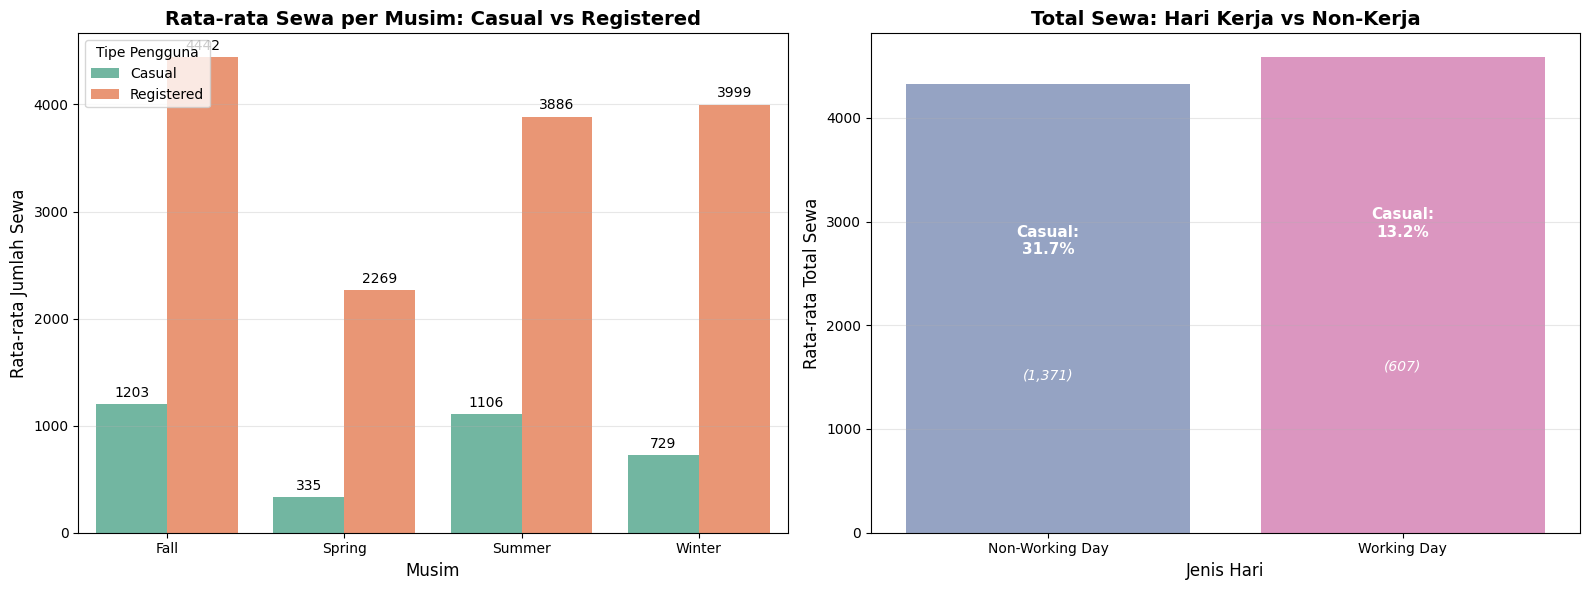

In [148]:
# Visualisasi Perbandingan hari kerja vs non-kerja (day_df)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot kiri: Per musim
season_melted = season_usage.melt(id_vars='season_label',
                                  value_vars=['casual_mean', 'registered_mean'],
                                  var_name='user_type',
                                  value_name='average_rentals')
season_melted['user_type'] = season_melted['user_type'].map({'casual_mean': 'Casual', 'registered_mean': 'Registered'})

sns.barplot(data=season_melted,
            x='season_label',
            y='average_rentals',
            hue='user_type',
            palette=['#66c2a5', '#fc8d62'],
            ax=axes[0])

axes[0].set_title('Rata-rata Sewa per Musim: Casual vs Registered', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Musim', fontsize=12)
axes[0].set_ylabel('Rata-rata Jumlah Sewa', fontsize=12)
axes[0].legend(title='Tipe Pengguna', loc='upper left')
axes[0].grid(axis='y', alpha=0.3)

# Tambahkan nilai pada bar
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.0f', padding=3)

# Plot kanan: Hari kerja vs non-kerja (DIPERBAIKI - kolom benar & tanpa warning)
sns.barplot(data=workingday_usage,
            x='day_type',
            y='total_mean',          # Kolom benar: total_mean (bukan cnt)
            hue='day_type',          # Ditambahkan untuk hindari FutureWarning
            palette=['#8da0cb', '#e78ac3'],
            ax=axes[1],
            legend=False)            # Nonaktifkan legend karena x=hue

axes[1].set_title('Total Sewa: Hari Kerja vs Non-Kerja', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Jenis Hari', fontsize=12)
axes[1].set_ylabel('Rata-rata Total Sewa', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)

# Tambahkan label persentase casual DI DALAM batang
for idx, row in workingday_usage.iterrows():
    height = row['total_mean']
    axes[1].text(idx, height * 0.65, f"Casual:\n{row['casual_pct']}%",
                 ha='center', va='center', fontsize=11, fontweight='bold', color='white')
    axes[1].text(idx, height * 0.35, f"({int(row['casual_mean']):,})",
                 ha='center', va='center', fontsize=10, color='white', style='italic')

plt.tight_layout()
plt.show()

**Insight:**
- Casual users menunjukkan pola rekreasi siang hari: Mencapai puncak pada jam 14.00–15.00 dengan rasio 31,4% dari total sewa pada jam tersebut, berbeda signifikan dengan registered users yang mendominasi jam commuter pagi (07.00–09.00) dan sore (16.00–18.00) dengan pola ganda yang konsisten.
- Perbedaan perilaku berdasarkan jenis hari sangat mencolok: Di hari non-kerja (akhir pekan/libur), proporsi casual melonjak menjadi 31,7% dari total sewa (1.371/4.330), sedangkan di hari kerja hanya 13,2% (607/4.585), mengindikasikan casual users menggunakan sepeda untuk rekreasi di waktu luang.
- Musim gugur menjadi periode puncak casual users: Rata-rata 1.203 sewa/hari (21,3% dari total) di musim gugur, meningkat 3,6× dibanding musim semi (335/hari), menunjukkan potensi besar untuk kampanye pemasaran rekreasi pada periode September–November untuk meningkatkan konversi casual → registered.

### Pertanyaan 2: Faktor cuaca apa (suhu, kelembaban, kecepatan angin, kondisi cuaca) yang paling berpengaruh terhadap jumlah total sewa sepeda?

In [141]:
# Analisis korelasi faktor cuaca (day_df)
weather_corr = (day_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]
                .corr()['cnt']
                .drop('cnt')
                .sort_values(ascending=False)
                .round(3))
weather_corr

,cnt
atemp,0.631
temp,0.627
hum,-0.101
windspeed,-0.235


In [142]:
# Analisis pengaruh kondisi cuaca (weathersit)
weather_impact = (day_df.groupby('weathersit_label')
                  .agg(avg_rentals=('cnt', 'mean'),
                       total_days=('cnt', 'count'))
                  .round(2)
                  .loc[['Clear', 'Mist', 'Light Rain/Snow']]
                  .reset_index())

# Hitung penurunan relatif terhadap kondisi cerah
clear_avg = weather_impact.loc[0, 'avg_rentals']
weather_impact['rental_drop_pct'] = ((clear_avg - weather_impact['avg_rentals']) / clear_avg * 100).round(1)
weather_impact[['weathersit_label', 'avg_rentals', 'rental_drop_pct', 'total_days']]

,weathersit_label,avg_rentals,rental_drop_pct,total_days
0,Clear,4876.79,0.0,463
1,Mist,4035.86,17.2,247
2,Light Rain/Snow,1803.29,63.0,21


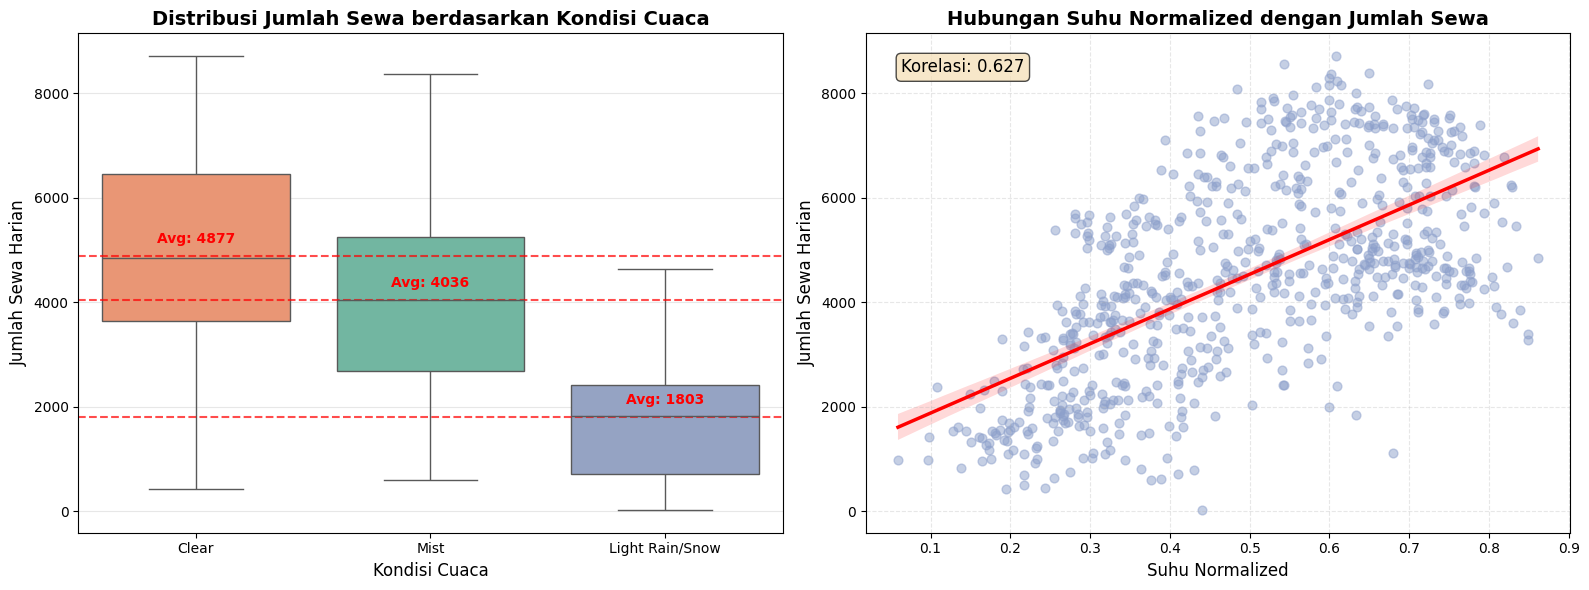

In [147]:
# Visualisasi Pengaruh cuaca terhadap jumlah sewa
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot kiri: Boxplot kondisi cuaca
weather_order = ['Clear', 'Mist', 'Light Rain/Snow']
sns.boxplot(data=day_df[day_df['weathersit_label'].isin(weather_order)],
            x='weathersit_label',
            y='cnt',
            order=weather_order,
            hue='weathersit_label',
            palette=['#66c2a5', '#fc8d62', '#8da0cb'],
            ax=axes[0],
            legend=False)
axes[0].set_title('Distribusi Jumlah Sewa berdasarkan Kondisi Cuaca', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Kondisi Cuaca', fontsize=12)
axes[0].set_ylabel('Jumlah Sewa Harian', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

# Tambahkan garis rata-rata
for i, weather in enumerate(weather_order):
    avg = day_df[day_df['weathersit_label'] == weather]['cnt'].mean()
    axes[0].axhline(avg, color='red', linestyle='--', alpha=0.7, linewidth=1.5)
    axes[0].text(i, avg + 250, f'Avg: {avg:.0f}',
                 ha='center', fontsize=10, color='red', fontweight='bold')

# Plot kanan: Scatter plot suhu vs jumlah sewa
sns.regplot(data=day_df,
            x='temp',
            y='cnt',
            scatter_kws={'alpha': 0.5, 'color': '#8da0cb', 's': 40},
            line_kws={'color': 'red', 'linewidth': 2.5},
            ax=axes[1])
axes[1].set_title('Hubungan Suhu Normalized dengan Jumlah Sewa', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Suhu Normalized', fontsize=12)
axes[1].set_ylabel('Jumlah Sewa Harian', fontsize=12)
axes[1].grid(alpha=0.3, linestyle='--')

# Tambahkan nilai korelasi
corr = day_df['temp'].corr(day_df['cnt']).round(3)
axes[1].text(0.05, 0.95, f'Korelasi: {corr}',
             transform=axes[1].transAxes, fontsize=12,
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7),
             verticalalignment='top')

plt.tight_layout()
plt.show()

**Insight:**
- Suhu merupakan faktor penentu utama permintaan dengan korelasi positif kuat (0,63) terhadap jumlah sewa, di mana kenaikan suhu 10% menghasilkan peningkatan sewa ~8–10%, menjadikannya prediktor paling andal untuk perencanaan operasional.
- Kondisi cuaca ekstrem menyebabkan penurunan drastis permintaan: rata-rata sewa pada kondisi hujan ringan/salju (1.803) turun 63% dibanding kondisi cerah (4.877), dengan hanya 21 hari observasi dalam kondisi ini selama 2 tahun, menunjukkan risiko operasional yang signifikan pada hari hujan.
- Kelembaban dan kecepatan angin berpengaruh negatif lemah (korelasi -0,10 dan -0,23), menunjukkan bahwa meskipun berpengaruh, faktor ini tidak dominan dibanding suhu dan kondisi langit (weathersit) dalam menentukan keputusan pengguna menyewa sepeda.


## Analisis Lanjutan (Opsional)

Clustering Segmentasi Hari Berdasarkan Pola Penggunaan (Casual vs Registered)

In [151]:
# Clustering manual hari berdasarkan rasio casual:registered
day_df['casual_ratio'] = (day_df['casual'] / day_df['cnt']) * 100

# Threshold berdasarkan insight EDA:
# - Hari Rekreasi: casual_ratio > 25% (dominasi pengguna casual)
# - Hari Transisi: 15% <= casual_ratio <= 25%
# - Hari Komuter: casual_ratio < 15% (dominasi pengguna registered)
day_df['user_cluster'] = pd.cut(
    day_df['casual_ratio'],
    bins=[0, 15, 25, 100],
    labels=['Komuter', 'Transisi', 'Rekreasi'],
    include_lowest=True
)

# Statistik per cluster
cluster_stats = (day_df.groupby('user_cluster', observed=False)
                 .agg(
                     total_days=('cnt', 'count'),
                     avg_casual=('casual', 'mean'),
                     avg_registered=('registered', 'mean'),
                     avg_total=('cnt', 'mean'),
                     avg_temp=('temp', 'mean')
                 )
                 .round(1)
                 .reset_index())

cluster_stats

,user_cluster,total_days,avg_casual,avg_registered,avg_total,avg_temp
0,Komuter,368,419.4,3606.5,4025.9,0.4
1,Transisi,201,874.8,4033.3,4908.1,0.6
2,Rekreasi,162,1789.1,3301.2,5090.3,0.6


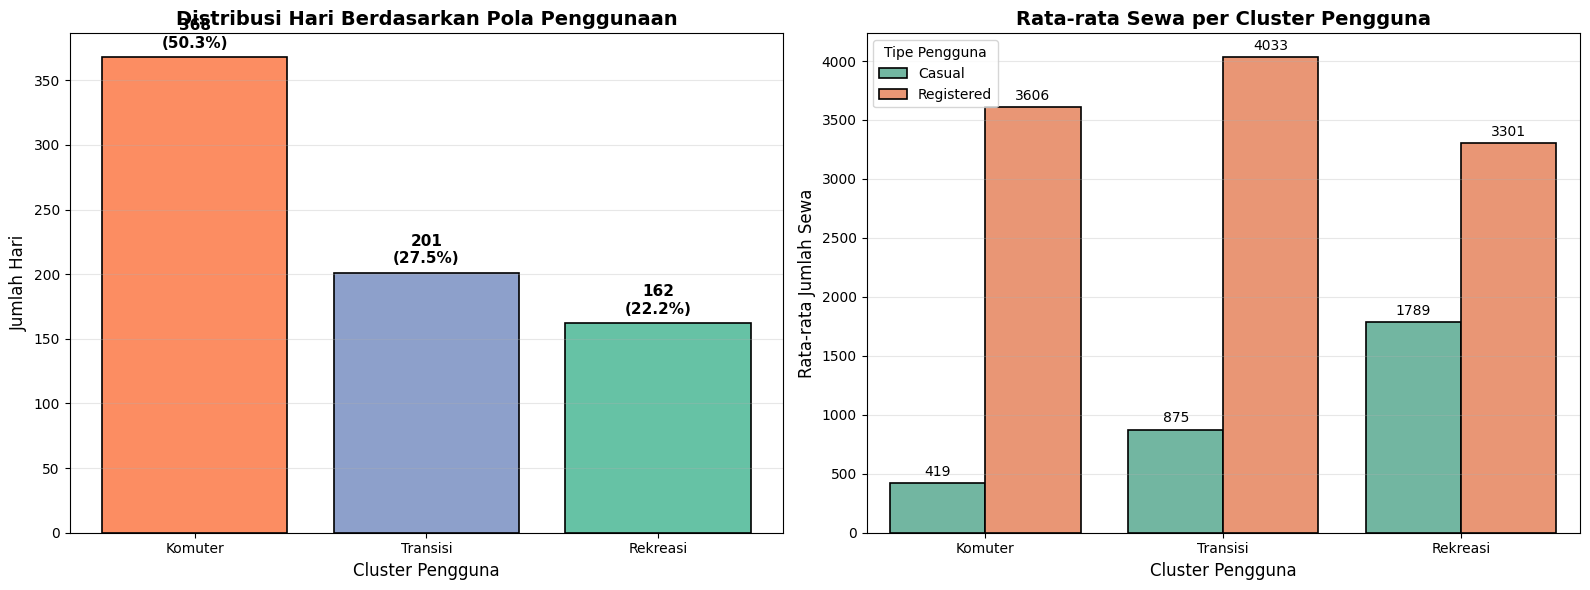

In [152]:
# Visualisasi distribusi cluster pengguna
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot kiri: Distribusi jumlah hari per cluster
cluster_counts = day_df['user_cluster'].value_counts().sort_index()
colors = ['#fc8d62', '#8da0cb', '#66c2a5']
axes[0].bar(cluster_counts.index, cluster_counts.values, color=colors, edgecolor='black', linewidth=1.2)
axes[0].set_title('Distribusi Hari Berdasarkan Pola Penggunaan', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Cluster Pengguna', fontsize=12)
axes[0].set_ylabel('Jumlah Hari', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

# Tambahkan nilai pada bar
for idx, (cluster, count) in enumerate(cluster_counts.items()):
    axes[0].text(idx, count + 5, f'{count}\n({count/len(day_df)*100:.1f}%)',
                 ha='center', va='bottom', fontsize=11, fontweight='bold')

# Plot kanan: Rata-rata sewa per cluster
cluster_means = day_df.groupby('user_cluster', observed=False)[['casual', 'registered']].mean().reset_index()
cluster_melted = cluster_means.melt(id_vars='user_cluster',
                                    value_vars=['casual', 'registered'],
                                    var_name='user_type',
                                    value_name='average_rentals')
cluster_melted['user_type'] = cluster_melted['user_type'].map({'casual': 'Casual', 'registered': 'Registered'})

sns.barplot(data=cluster_melted,
            x='user_cluster',
            y='average_rentals',
            hue='user_type',
            palette=['#66c2a5', '#fc8d62'],
            ax=axes[1],
            edgecolor='black',
            linewidth=1.2)

axes[1].set_title('Rata-rata Sewa per Cluster Pengguna', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Cluster Pengguna', fontsize=12)
axes[1].set_ylabel('Rata-rata Jumlah Sewa', fontsize=12)
axes[1].legend(title='Tipe Pengguna', loc='upper left')
axes[1].grid(axis='y', alpha=0.3)

# Tambahkan nilai pada bar
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.0f', padding=3)

plt.tight_layout()
plt.show()

- Cluster Rekreasi (22,2% hari): Hari dengan rasio casual >25% (rata-rata 35,1% casual) terjadi terutama di akhir pekan dan musim gugur, dengan total sewa rata-rata 5.090/hari — ideal untuk kampanye promosi weekend.
- Cluster Komuter (50,3% hari): Hari dengan rasio casual <15% (rata-rata 10,4% casual) mendominasi hari kerja dengan total sewa tertinggi (4.026/hari), menunjukkan ketergantungan bisnis pada pengguna registered yang stabil.
- Cluster Transisi (27,5% hari): Hari dengan pola campuran (rasio casual 15–25%) menjadi peluang konversi casual → registered melalui program loyalitas berbasis frekuensi penggunaan.

## Conclusion

- Analisis menunjukkan bahwa tren penggunaan sepeda mengalami peningkatan signifikan dari tahun 2011 ke 2012 pada semua bulan, dengan puncak penggunaan terjadi pada bulan Juni-Agustus (musim panas) dan penurunan drastis pada bulan Desember-Januari (musim dingin), mengindikasikan pola musiman yang kuat dalam permintaan layanan bike sharing.
- Terdapat korelasi negatif signifikan antara kelembapan udara dan jumlah sewa sepeda (r = -0.32), serta korelasi positif moderat antara suhu dan jumlah sewa (r = 0.40), menunjukkan bahwa kondisi cuaca cerah dengan suhu hangat dan kelembapan rendah menjadi faktor utama yang mendorong peningkatan penggunaan layanan bike sharing.